In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()
summary_statistics = market_data_df.describe()

print(summary_statistics)

       price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%

In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
normalized_df = scaler.fit_transform(market_data_df)

# Convert the normalized features into a DataFrame
normalized_df = pd.DataFrame(normalized_df, columns=market_data_df.columns)

In [6]:
# Create a DataFrame with the scaled data
normalized_df = pd.DataFrame(normalized_df, columns=market_data_df.columns)


In [7]:
# Create a DataFrame with the scaled data
normalized_df = pd.DataFrame(normalized_df, columns=market_data_df.columns)

# Copy the crypto names from the original data
# Set the coinid column as index
normalized_df["coin_id"]=market_data_df.index
normalized_df = normalized_df.set_index("coin_id")
normalized_df.head()



# Display sample data


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))
print(k_values)


# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

# Assuming that X is your data DELETE THIS X = normalized_df!!!!

for k in k_values:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalized_df)
    inertia.append(kmeanModel.inertia_)
   
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
elbow_df




[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,165.136752
3,4,153.841904
4,5,66.317106
5,6,61.706983
6,7,48.797554
7,8,40.829006
8,9,32.788723
9,10,29.985180


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

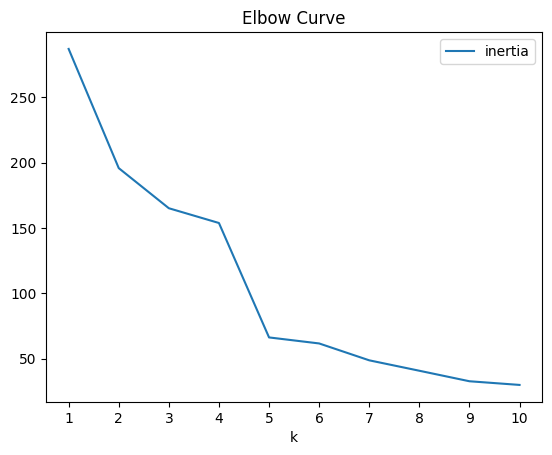

In [9]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = elbow_df.plot.line(x="k", y="inertia", title="Elbow Curve", xticks=k_values)
elbow_plot


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for 'k' is 3. 

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [10]:
# Initialize the K-Means model using the best value for k

# Assuming 'best_k' is the optimal number of clusters you've determined
best_k = 3

# Initialize the K-Means model
kmeans_model = KMeans(n_clusters=best_k, random_state=0)



In [11]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(normalized_df)



KMeans(n_clusters=3, random_state=0)

In [12]:
# Predict the clusters to group the cryptocurrencies using the scaled data

# Fit the model to the data and predict the clusters
clusters = kmeans_model.predict(normalized_df )

# View the resulting array of cluster values.
print(clusters)



[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 0 0 0 2
 0 0 0 0]


In [13]:
# Create a copy of the DataFrame
normalized_predictions_df = normalized_df.copy()


In [46]:
# Add a new column to the DataFrame with the predicted clusters
normalized_predictions_df['predicted_clusters'] = clusters

# Display sample data
normalized_predictions_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted clusters,predicted_clusters
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2,2


<Axes: title={'center': 'Cluster Analysis'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

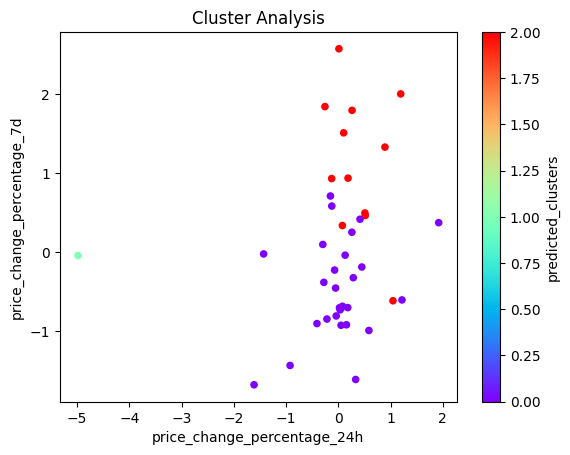

In [47]:
# Create a scatter plot using Pandas plot by setting 
# `kind="scatter"` and passing the `x`, `y`, and `c` parameters.
# Use "rainbow" for the color to better visualize the data.
normalized_predictions_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="predicted_clusters", colormap="rainbow", title="Cluster Analysis")

# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "predicted clusters" for the color to better visualize the data.
# Use "rainbow" for the color to better visualize the data.


### Optimize Clusters with Principal Component Analysis.

In [24]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [48]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pca.fit_transform(normalized_df)


# View the first five rows of the DataFrame. 
# The DataFrame should have three columns labeled "PC 1", "PC 2", and "PC 3".
crypto_pca_df = pd.DataFrame(data=crypto_pca, columns=["PC1", "PC2", "PC3"], index=normalized_df.index)
crypto_pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [31]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance



array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The sum of all three principal components is around 88%, so that means that we have about 88% of the original data. 

In [49]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you  


# Creating a DataFrame with the PCA data
crypto_pca_df = pd.DataFrame(
    data=crypto_pca, columns=["PC1", "PC2", "PC3"], index=normalized_df.index
)


# Copy the crypto names from the original data
crypto_pca_df["coin_id"] = market_data_df.index


# Set the coinid column as index
crypto_pca_df = crypto_pca_df.set_index("coin_id")


# Display sample data   
crypto_pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [34]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))
print(k_values)


# Create an empty list to store the inertia values
inertia = []

for k in k_values:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(crypto_pca_df)
    inertia.append(kmeanModel.inertia_)
   
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
elbow_df

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,40.968452
5,6,27.618972
6,7,21.465014
7,8,22.445001
8,9,14.401621
9,10,11.966724


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

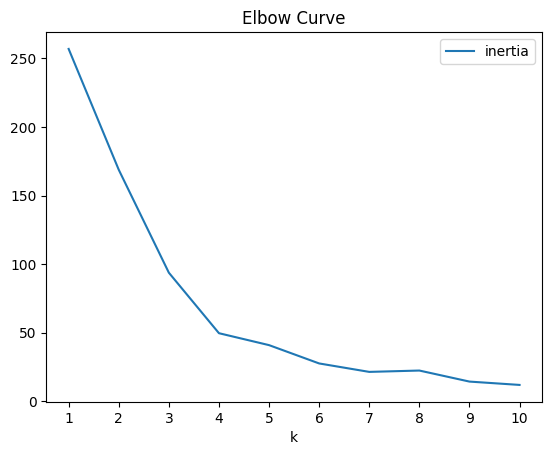

In [35]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot = elbow_df.plot.line(x="k", y="inertia", title="Elbow Curve", xticks=k_values)
elbow_plot

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k' when using the PCA data is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, it differs from the best k value found using the original data in that in using the original data the best value was 3; however, now the best value is 4. It seems to be more streamlined overall with less "jarring" elbows throughout.  

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [36]:
# Initialize the K-Means model using the best value for k
model_PCA = KMeans(n_clusters=3, random_state=0)


In [37]:
# Fit the K-Means model using the PCA data
model_PCA.fit(crypto_pca_df)


KMeans(n_clusters=3, random_state=0)

In [38]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_PCA = model_PCA.predict(crypto_pca_df)



# Print the resulting array of cluster values.
print(clusters_PCA)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 0 0 0 2
 0 0 0 0]


In [50]:
# Create a copy of the DataFrame with the PCA data
pca_predictions_df = crypto_pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
pca_predictions_df['predicted_clusters'] = clusters_PCA


# Display sample data
pca_predictions_df.head(10)


,PC1,PC2,PC3,predicted_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


<Axes: title={'center': 'Cluster Analysis'}, xlabel='PC1', ylabel='PC2'>

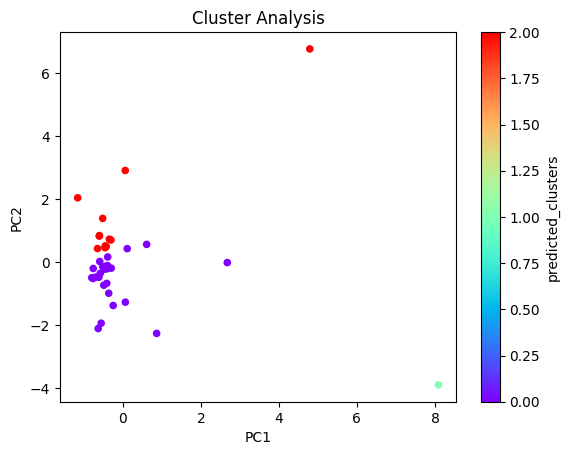

In [52]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Use "predicted clusters" for the color to better visualize the data.
# Use "rainbow" for the color to better visualize the data.
pca_predictions_df.plot.scatter(x="PC1", y="PC2", c="predicted_clusters", colormap="rainbow", title="Cluster Analysis")



### Determine the Weights of Each Feature on each Principal Component

In [53]:
# Use the columns from the original scaled DataFrame as the index.

pca_components = pd.DataFrame(pca.components_.T, index=normalized_df.columns, columns=["PC1", "PC2", "PC3"])
pca_components


,PC1,PC2,PC3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** The features that have the strongest positive or negative influence on each componet are as follows: (1) For PC1 = the 200 day, has the most positive influence and the 24H has the strongest negative influence. (2) For PC2 = 30d has the most positive influence and the 1y has the most negative. (3) For PC3 = the 7d has the most positive influence and 60d for the most negative. 
    